In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
edgelist_df = pd.read_csv("edge_table.csv")
graph_data = edgelist_df[["Source", "target", "target_date_seq"]]
graph_data["weight"] = 1 / graph_data["target_date_seq"]

del graph_data["target_date_seq"]
graph_data.columns = ["source", "target", "weight"]

G = nx.from_pandas_edgelist(graph_data, "source", "target", "weight", nx.DiGraph)
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 84\nNumber of edges: 2398\nAverage in degree:  28.5476\nAverage out degree:  28.5476'

**Spectral Clustering**

In [59]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

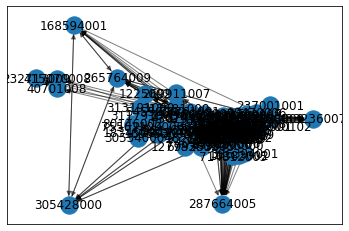

In [60]:
draw_graph(G)

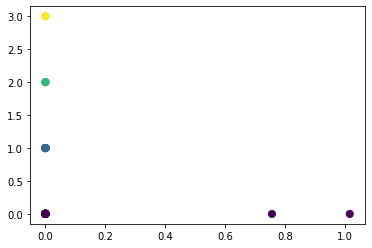

In [24]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np


adj = nx.adjacency_matrix(G)
sc = SpectralClustering(4, affinity='precomputed', n_init=100,
                            assign_labels='discretize')
node_list = list(G.nodes())
clusters = sc.fit_predict(adj)
plt.scatter(np.array(node_list)/1e15,clusters,c=clusters,s=50,cmap='viridis')
plt.show()

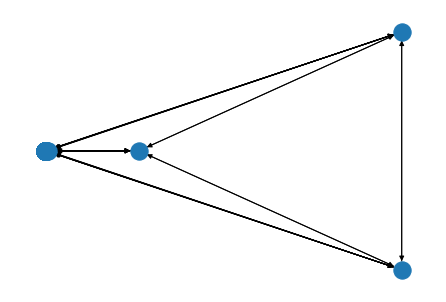

In [28]:
nx.draw_spectral(G)

In [25]:
pd.DataFrame(list(zip(node_list,clusters))).groupby(1).count()

,0
1,
0,58
1,21
2,3
3,2


In [26]:
pd.DataFrame(list(zip(node_list,clusters)))

,0,1
0,60027007,1
1,274474001,1
2,312681000,1
3,430193006,1
4,269911007,1
...,...,...
79,415070008,2
80,232717009,2
81,265764009,1
82,168594001,1


twint -s "#trump" -g="48.880048,2.385939,1km" -o #trump_chicago.csv --since "2020-01-01 00:00:00" --min-likes 5 --csv
twint -s "trump" -g="48.880048,2.385939,1km" -o trump_chicago.csv --since "2020-01-01 00:00:00" --min-likes 5 --csv
twint -s "#trump" -g="48.880048,2.385939,1km" -o #trump_Boston.csv --since "2020-01-01 00:00:00" --min-likes 5 --csv
twint -s "trump" -g="48.880048,2.385939,1km" -o trump_Boston.csv --since "2020-01-01 00:00:00" --min-likes 5 --csv


In [1]:
import pandas as pd
lat = pd.read_csv('uscities.csv')
lat.head()

city_dict = dict(pd.concat([lat['city_ascii']+","+lat['state_id'].values,lat['lat'].astype(str)+","+lat['lng'].astype(str)+","+"50km"],axis=1).values)

In [2]:
query = {'search':['trump','biden'],#,'#biden','#trump2020','#biden2020'],
         'geoid':city_dict}
ls = []
for location,geoid in query['geoid'].items():
    for sq in query['search']:
        ls.append('twint -s "{}" -g="{}" -o {}.json --since 2020-01-01 --json\n'.format(sq,geoid,sq+"_"+location))

In [3]:
len(ls)

56708

In [4]:
file1 = open("tweet_scrap.txt","a") 
file1.writelines(ls)